# Tutorial for publication-style plots

In this short tutorial I will go through some of my practices in making plots for publication and presentation. The procedure easily scales from single to multiple plots of different sizes.

## #1 Single plot

### Import libraries

The main library to import is matplotlib. Numpy, scipy are imported as well.

In [1]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg')  # Generates image without displaying the image (non-interactive backend)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.ndimage.filters import gaussian_filter

from matplotlib.ticker import rcParams

### Plot general characteristics

rcParams allows you to define general plot characteristics, such as line widths, lengths of ticks, etc.
This particular example uses Arial as the font, you can use the font of your choice.

In [2]:
font='Arial'

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 4
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 2
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 4
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 2
rcParams['ytick.minor.width'] = 1
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [font]
rcParams['font.size'] = 14
rcParams['mathtext.default'] = 'regular'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

from matplotlib import rc # This sometimes gives problems

legend_properties = {'weight':'normal', 'size':10}
axisl_properties = {'family':'sans-serif','sans-serif':[font], 'weight':'bold'}
label_properties = {'weight':'normal', 'size':10}

### Import data

We use numpy's function loadtxt to get the data. We can do further data manipulation.

In [3]:
temp0,temp1,temp2,temp3= np.loadtxt('cr.txt').T

temp1=temp1*50.3*24/24

### The plot itself!

Here I use a trick to set the units of distances in everything to be inches. I find it useful as setting image size correctly allows for font sizes and everything to be consistent. When defining a figure's size, Matplotlib asks for the dimensions of the figure, and then axes can be set in distances relative to the image size. My trick is to set the figure size to 1x1 inches, so setting axes becomes simply to state the distances in inches. SI afficionados can do a similar trick using centimeters.



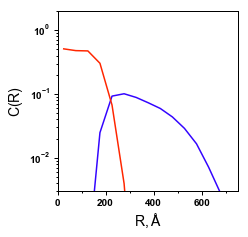

In [4]:
fig = plt.figure()
fig.set_size_inches(1.00, 1.00, forward=True)
ax1= fig.add_axes([.75,.75,2.5,2.5])

# Line plots. Note the linestyle, color, and label fields.
# Please note that the color is the hexadecimal rgb code. 
# Matplotlib allows simple color name usage, grayscale, etc. 
# Please refer to the documentstion: 
# https://matplotlib.org/2.0.2/api/colors_api.html 

ax1.plot(temp1,temp2,color='#3304ff',linestyle='-',label='A')
ax1.plot(temp1,temp3,color='#ff2600',linestyle='-',label='B')

# Optional legend. The "label" field in the above line plots 
# is the text that will appear in the legend.
#ax1.legend(loc='best', prop=legend_properties, numpoints = 1) #,frameon=False)

# Axis titles

ax1.set_ylabel(r'$C(R)$',fontsize=14)
ax1.set_xlabel(r'$R, \AA$',fontsize=14)

# Axis limits

ax1.set_xlim(0,750)
ax1.set_ylim(.003,2)

# Tick location for the x axis

ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))   # sets major tick spacing
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))   # sets minor tick spacing

# Tick label font

ax1.set_xticklabels(ax1.get_xticks(), fontweight='bold', fontsize=10)
ax1.set_yticklabels(ax1.get_yticks(), fontweight='bold', fontsize=10)

# Tick label format

ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# In this plot the y axis is in log scale

ax1.set_yscale("log")

# Finally, plot the thing!
# There are commented out statements that generate a .png and a .svg versions of the plot.
# .png is great for presentations as it maintains a high level of resolution without filling up disk space.
# .svg is a vector image that can then be edited in Illustrator-like programs and maintains all the resolution
# this is of paramout importance for peer-reviewed articles, as journals will ask for images in hi-res.

#plt.savefig('cr.png', bbox_inches='tight', dpi=600)
#plt.show()
#plt.savefig('cr.svg', bbox_inches='tight')
plt.show()

## #2 Multiple plots

Having multiple plots is a simple extension of the single plot set above. What you do is set different sets of axes in locations and dimensions as you require.

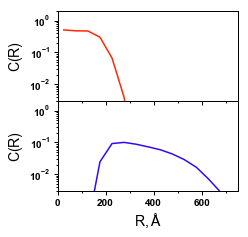

In [5]:
fig = plt.figure()
fig.set_size_inches(1.00, 1.00, forward=True)

# The two sets of axes are defined so ax2 is on top of ax1.
# In this example the x axis is the same for both plots

ax1= fig.add_axes([.75,.75,2.5,1.25])
ax2= fig.add_axes([.75,.75+1.25,2.5,1.25])

# Line plots

ax1.plot(temp1,temp2,color='#3304ff',linestyle='-',label='A')
ax2.plot(temp1,temp3,color='#ff2600',linestyle='-',label='B')

#ax1.legend(loc='best', prop=legend_properties, numpoints = 1) #,frameon=False)
#ax2.legend(loc='best', prop=legend_properties, numpoints = 1) #,frameon=False)

# Axis titles

ax1.set_ylabel(r'$C(R)$',fontsize=14)
ax1.set_xlabel(r'$R, \AA$',fontsize=14)

# For ax2 we do not need to define the x axis, as the title is shared
ax2.set_ylabel(r'$C(R)$',fontsize=14)


# Axis limits

ax1.set_xlim(0,750)
ax1.set_ylim(.003,2)
ax2.set_xlim(0,750)
ax2.set_ylim(.003,2)

# Tick location for the x axis

ax1.xaxis.set_major_locator(ticker.MultipleLocator(200))   # sets major tick spacing
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(100))   # sets minor tick spacing
ax2.xaxis.set_major_locator(ticker.MultipleLocator(200))   # sets major tick spacing
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(100))   # sets minor tick spacing


# Tick label font

ax1.set_xticklabels(ax1.get_xticks(), fontweight='bold', fontsize=10)
ax1.set_yticklabels(ax1.get_yticks(), fontweight='bold', fontsize=10)

# The x axis labels arenot needed for ax2 as it lays on top of ax1

ax2.set_xticklabels([])
ax2.set_yticklabels(ax1.get_yticks(), fontweight='bold', fontsize=10)

# Tick label format

ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# In this plot the y axis is in log scale

ax1.set_yscale("log")
ax2.set_yscale("log")

# Finally, plot the thing!
# Same as above, option for .png and .svg is available.

#plt.savefig('cr.png', bbox_inches='tight', dpi=600)
#plt.show()
#plt.savefig('cr.svg', bbox_inches='tight')
plt.show()